In [40]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def get_metrics(log_file):
    with open(log_file, 'r') as temp:
        lines = temp.readlines()
        
    # Get metrics
    train_dict = {'Step': [], 'Acc': [], 'Loss': []}
    eval_dict = {'Step': [], 'Acc': [], 'Loss': []}
    is_conf_line = True
    conf = ''
    
    for line in lines:
        info = None
            
        if '[TRAIN]' in line:
            is_conf_line = False
            items = line.split('[TRAIN]')[-1].split(';')
            for item in items:
                key, value = item.strip().split(':')
                train_dict[key].append(float(value))
        if '[EVAL]' in line:
            items = line.split('[EVAL]')[-1].split(';')
            for item in items:
                key, value = item.strip().split(':')
                eval_dict[key].append(float(value))
                
        if is_conf_line:
            if 'INFO:' in line:
                line = line.split('INFO:')[-1].strip() + '\n'
            conf += line
            
    return conf, train_dict, eval_dict

In [51]:
log_file = 'resnet/resnet_train_lr_1e-3.log'
conf, train_dict, eval_dict = get_metrics(log_file)

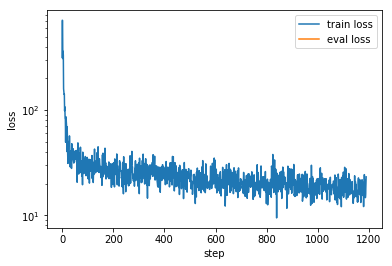

In [52]:
plt.plot(train_dict['Step'], train_dict['Loss'], label='train loss')
plt.plot(eval_dict['Step'], eval_dict['Loss'], label='eval loss')
plt.yscale('log')
plt.legend()
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

In [53]:
print(conf)

### Model ###
ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
   